In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

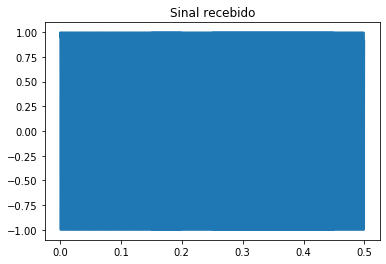

In [7]:
#Espectrograma 2FSK
data, Fs = sf.read('teste_2fsk.wav') 
baudRate=20
start_bit=40
start=int((start_bit/baudRate)*Fs)
data=data[start:start+int((10/baudRate)*Fs)]
t=np.arange(0,len(data)/Fs,1/Fs)
plt.plot(t,data)
plt.title('Sinal recebido')
plt.show()

In [8]:
data

array([0.9510498 , 0.99996948, 0.9781189 , ..., 0.66912842, 0.80899048,
       0.9135437 ])

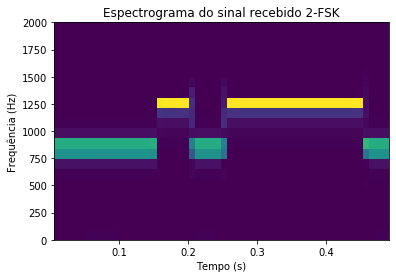

In [9]:
f_spec,t_spec,Sxx=signal.spectrogram(data,Fs)
plt.pcolormesh(t_spec,f_spec,Sxx)
plt.title('Espectrograma do sinal recebido 2-FSK')
plt.ylim(0,2000)
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')
plt.show(block=False)

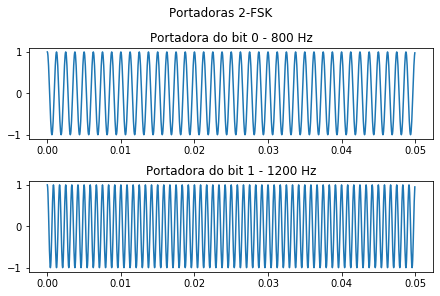

In [10]:
F1=800
F2=1200
t_wave=np.arange(0,1/baudRate,1/Fs)

wave1=np.cos(2*np.pi*F1*t_wave)
wave2=np.cos(2*np.pi*F2*t_wave)

#Apresentação das portadoras 2 FSK
fig, axs = plt.subplots(2,1,constrained_layout=True)
fig.suptitle('Portadoras 2-FSK')
axs[0].plot(t_wave,wave1)
axs[0].set_title('Portadora do bit 0 - 800 Hz')
axs[1].plot(t_wave,wave2)
axs[1].set_title('Portadora do bit 1 - 1200 Hz')
plt.show()

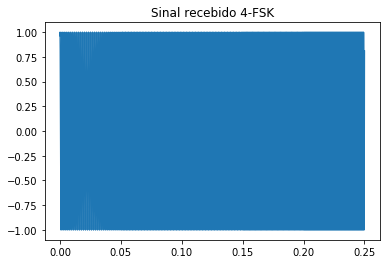

In [11]:
#Espectrograma 4FSK
data4, Fs = sf.read('teste_4fsk.wav') 
start_bit=20
start=int((start_bit/baudRate)*Fs)     # Fs/baudRate = numero de amostras por simbolos
data4=data4[start:start+int((5/baudRate)*Fs)]
t4=np.arange(0,len(data4)/Fs,1/Fs)
plt.plot(t4,data4)
plt.title('Sinal recebido 4-FSK')
plt.show()

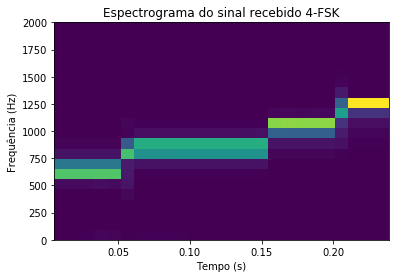

In [12]:
f_spec,t_spec,Sxx=signal.spectrogram(data4,Fs)
plt.pcolormesh(t_spec,f_spec,Sxx)
plt.title('Espectrograma do sinal recebido 4-FSK')
plt.ylim(0,2000)
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')
plt.show(block=False)

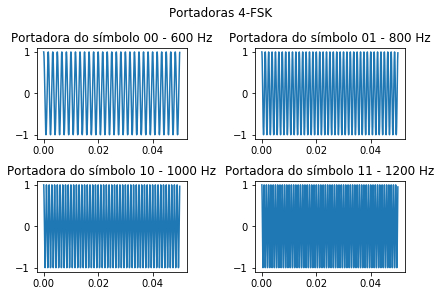

In [13]:
F1=600
F2=800
F3=1000
F4=1200

t_wave=np.arange(0,1/baudRate,1/Fs)

wave1=np.cos(2*np.pi*F1*t_wave)
wave2=np.cos(2*np.pi*F2*t_wave)
wave3=np.cos(2*np.pi*F3*t_wave)
wave4=np.cos(2*np.pi*F4*t_wave)

#Apresentação das portadoras
fig, axs = plt.subplots(2,2,constrained_layout=True)
fig.suptitle('Portadoras 4-FSK')
axs[0,0].plot(t_wave,wave1)
axs[0,0].set_title('Portadora do símbolo 00 - 600 Hz')
axs[0,1].plot(t_wave,wave2)
axs[0,1].set_title('Portadora do símbolo 01 - 800 Hz')
axs[1,0].plot(t_wave,wave3)
axs[1,0].set_title('Portadora do símbolo 10 - 1000 Hz')
axs[1,1].plot(t_wave,wave4)
axs[1,1].set_title('Portadora do símbolo 11 - 1200 Hz')
plt.show()

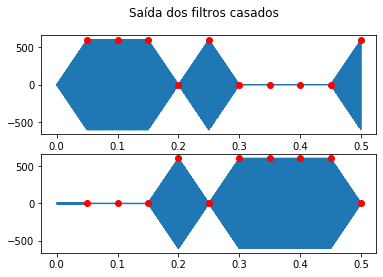

In [14]:
F1=800
F2=1200
t_wave=np.arange(0,1/baudRate,1/Fs)

wave1=np.cos(2*np.pi*F1*t_wave)
wave2=np.cos(2*np.pi*F2*t_wave)

#Aplicação do filtro casado
casado_1=np.convolve(data,np.flip(wave1))
casado_2=np.convolve(data,np.flip(wave2))

#Amostragem do filtro casado a cada período de bit
step=int(Fs/baudRate)

amostra_casado1=casado_1[step::step]
amostra_casado2=casado_2[step::step]
t_amostra=np.arange(step/Fs,t[-1]+step/Fs,step/Fs)


fig, axs = plt.subplots(2)
fig.suptitle('Saída dos filtros casados')
axs[0].plot(t,casado_1[0:len(t)])
axs[0].plot(t_amostra,amostra_casado1,'or')
axs[1].plot(t,casado_2[0:len(t)])
axs[1].plot(t_amostra,amostra_casado2,'or')
plt.show()

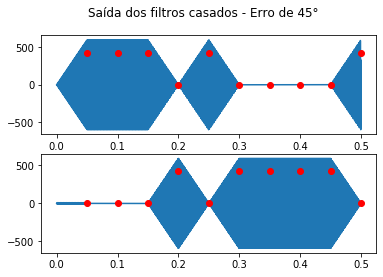

In [15]:
#Filtro casado com erro de fase de 45°
wave1=np.cos(2*np.pi*F1*t_wave+np.pi/4)
wave2=np.cos(2*np.pi*F2*t_wave+np.pi/4)

#Aplicação do filtro casado
casado_1=np.convolve(data,np.flip(wave1))
casado_2=np.convolve(data,np.flip(wave2))

#Amostragem do filtro casado a cada período de bit
amostra_casado1=casado_1[step::step]
amostra_casado2=casado_2[step::step]
t_amostra=np.arange(step/Fs,t[-1]+step/Fs,step/Fs)


fig, axs = plt.subplots(2)
fig.suptitle('Saída dos filtros casados - Erro de 45°')
axs[0].plot(t,casado_1[0:len(t)])
axs[0].plot(t_amostra,amostra_casado1,'or')
axs[1].plot(t,casado_2[0:len(t)])
axs[1].plot(t_amostra,amostra_casado2,'or')
plt.show()

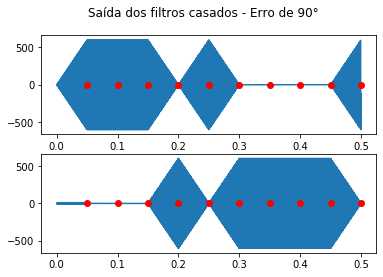

In [16]:
#Filtro casado com erro de fase de 90°
wave1=np.cos(2*np.pi*F1*t_wave+np.pi/2)
wave2=np.cos(2*np.pi*F2*t_wave+np.pi/2)

#Aplicação do filtro casado
casado_1=np.convolve(data,np.flip(wave1))
casado_2=np.convolve(data,np.flip(wave2))

#Amostragem do filtro casado a cada período de bit
amostra_casado1=casado_1[step::step]
amostra_casado2=casado_2[step::step]
t_amostra=np.arange(step/Fs,t[-1]+step/Fs,step/Fs)


fig, axs = plt.subplots(2)
fig.suptitle('Saída dos filtros casados - Erro de 90°')
axs[0].plot(t,casado_1[0:len(t)])
axs[0].plot(t_amostra,amostra_casado1,'or')
axs[1].plot(t,casado_2[0:len(t)])
axs[1].plot(t_amostra,amostra_casado2,'or')
plt.show()

In [18]:
len(amostra_casado1)

10

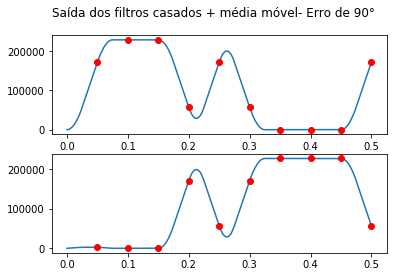

In [11]:
#Aplicação do filtro casado + média móvel
casado_1=np.convolve(data,np.flip(wave1))
casado_1=np.convolve(np.abs(casado_1),np.ones((int(len(t_wave)/2))))
casado_2=np.convolve(data,np.flip(wave2))
casado_2=np.convolve(np.abs(casado_2),np.ones((int(len(t_wave)/2))))

#Amostragem do filtro casado a cada período de bit
amostra_casado1=casado_1[step::step]
amostra_casado2=casado_2[step::step]
t_amostra=np.arange(step/Fs,t[-1]+step/Fs,step/Fs)


fig, axs = plt.subplots(2)
fig.suptitle('Saída dos filtros casados + média móvel- Erro de 90°')
axs[0].plot(t,casado_1[0:len(t)])
axs[0].plot(t_amostra,amostra_casado1[0:len(t_amostra)],'or')
axs[1].plot(t,casado_2[0:len(t)])
axs[1].plot(t_amostra,amostra_casado2[0:len(t_amostra)],'or')
plt.show()

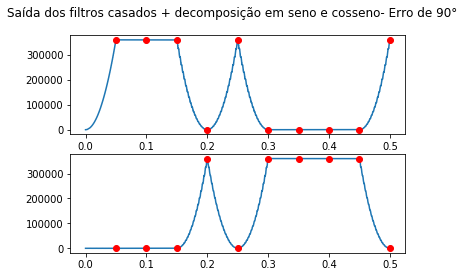

In [12]:
#Outra implementação:
#Filtro casado com erro de fase de 90°
wave1_sin=np.sin(2*np.pi*F1*t_wave+np.pi/2)
wave1_cos=np.cos(2*np.pi*F1*t_wave+np.pi/2)
wave2_sin=np.sin(2*np.pi*F2*t_wave+np.pi/2)
wave2_cos=np.cos(2*np.pi*F2*t_wave+np.pi/2)

#Aplicação do filtro casado + média móvel
casado_1=np.power(np.convolve(data,np.flip(wave1_sin)),2)+np.power(np.convolve(data,np.flip(wave1_cos)),2)
casado_2=np.power(np.convolve(data,np.flip(wave2_sin)),2)+np.power(np.convolve(data,np.flip(wave2_cos)),2)

amostra_casado1=casado_1[step::step]
amostra_casado2=casado_2[step::step]
t_amostra=np.arange(step/Fs,t[-1]+step/Fs,step/Fs)


fig, axs = plt.subplots(2)
fig.suptitle('Saída dos filtros casados + decomposição em seno e cosseno- Erro de 90°')
axs[0].plot(t,casado_1[0:len(t)])
axs[0].plot(t_amostra,amostra_casado1[0:len(t_amostra)],'or')
axs[1].plot(t,casado_2[0:len(t)])
axs[1].plot(t_amostra,amostra_casado2[0:len(t_amostra)],'or')
plt.show()